# Field Parameter Estimation 3 

- Finding Ellipses in Frames 

Ref : 


In [2]:
import matplotlib.pyplot as plt
from skimage import data, color, img_as_ubyte
from skimage.feature import canny
from skimage.transform import hough_ellipse
from skimage.draw import ellipse_perimeter

In [4]:
import torch
import numpy as np
import PIL
from tqdm import tqdm
from PIL import Image
import pytorch_lightning as pl
import segmentation_models_pytorch as smp
from matplotlib import pyplot as plt
import sys  
import os
from pathlib import Path
from matplotlib.pyplot import imshow
from matplotlib import pyplot as plt
import numpy as np

# Set Root Directory
root = Path('/mnt/c/Users/Samarth Negi/Desktop/soccerEye')
sys.path.insert(0, str(root))


from IPython.display import Video
import cv2
import methods 
import utils


In [7]:
# Set Dataset Path
dataset = Path('../dataset/df-bl/')
dataset = dataset.resolve()
print(f'Dataset Location : {dataset}')
dataset_files = utils.util_searching_all_files(dataset)
print(f'Number of files in dataset : {len(dataset_files)}')

Dataset Location : /mnt/c/Users/Samarth Negi/Desktop/soccerEye/dataset/df-bl
Number of files in dataset : 12


In [8]:
CHECKPOINT_LOCATION = '../weights/FPN_FieldMask_1/checkpoints/epoch=49-step=600.ckpt'

In [10]:
videoPick = np.random.randint(len(dataset_files))
print(f'Video Picked (index) : {videoPick}')
cap = cv2.VideoCapture(str(dataset_files[videoPick]))


Video Picked (index) : 3


## Working Area : Single Frame 

In [11]:
total_frames = cap.get(7)
print(total_frames)
cap.set(1, np.random.randint(total_frames))
ret, frame = cap.read()

87732.0


In [12]:
frame_w = frame.shape[1]
frame_h = frame.shape[0]

In [13]:
# Getting Field Isolate 
# Getting field mask 
frame_fm = methods.P_IF_4_FPN_CV2(frame,CHECKPOINT_LOCATION,inputType = 'single',device='cpu')

# Resize
frame_fm_sized = cv2.resize(frame_fm, (frame_w,frame_h), interpolation = cv2.INTER_LINEAR )
frame_fm_sized_binary = cv2.normalize(frame_fm_sized, None, 0, 1, cv2.NORM_MINMAX, cv2.CV_8U)

# Create Field Isolate
field_isolate = cv2.bitwise_and(frame,frame,mask = frame_fm_sized_binary)


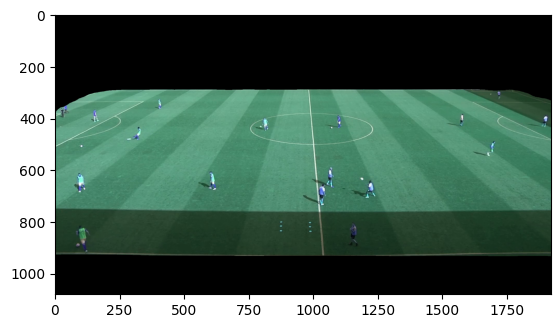

In [14]:
imshow(field_isolate)

In [31]:
# Load picture, convert to grayscale and detect edges
image_rgb = cv2.cvtColor(field_isolate, cv2.COLOR_BGR2RGB)
image_gray = color.rgb2gray(image_rgb)
edges = canny(image_gray, sigma=2.0,
              low_threshold=0, high_threshold=0.1)

### using contours

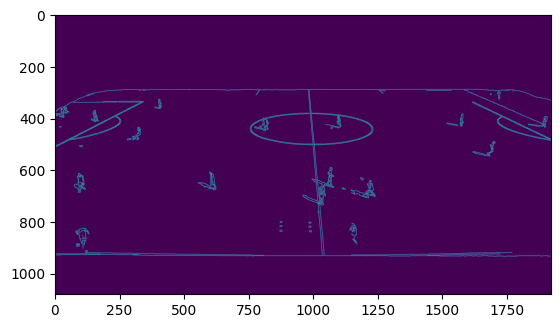

In [51]:
c1 = 90
c2 = 200
edges = cv2.Canny(field_isolate,c1,c2)
imshow(edges)